# California House Pricing Prediction
### NTI Graduation Project

* Data Source (Kaggle) : https://www.kaggle.com/datasets/camnugent/california-housing-prices/data

---

## Libraries

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Reading Data

In [27]:
data = pd.read_csv("data/housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [28]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 2. Data Cleaning

In [29]:
missing_values = data.isnull().sum()
print(missing_values)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [30]:
data.dropna(inplace=True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [31]:
print(data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


## 3. Feature Extraction

In [32]:
input_df = data.drop(columns='median_house_value')  # features
target_df = data['median_house_value']              # target

In [33]:
columns_to_encode = ["ocean_proximity"]
le = LabelEncoder()
for col in columns_to_encode:
    input_df["encoded_" + col] = le.fit_transform(input_df[col])

drop_columns = ["ocean_proximity"]
input_df = input_df.drop(drop_columns, axis=1)

In [34]:
input_df['encoded_ocean_proximity']

0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: encoded_ocean_proximity, Length: 20433, dtype: int64

## 4. Data Splitting

In [39]:
X_train, X_test, y_train, y_test = train_test_split(input_df, target_df, test_size=0.2)

In [40]:
# display training data
train_data = pd.concat([X_train, y_train], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,encoded_ocean_proximity,median_house_value
12696,-121.42,38.60,35.0,1166.0,193.0,574.0,190.0,2.2452,1,102800.0
14952,-116.95,32.73,17.0,1635.0,272.0,960.0,279.0,5.2671,0,157100.0
17605,-121.89,37.30,46.0,2639.0,448.0,938.0,424.0,5.0662,0,331600.0
9468,-123.80,39.44,33.0,2024.0,459.0,1019.0,422.0,1.9208,0,93600.0
1837,-122.30,37.90,35.0,1102.0,308.0,688.0,303.0,2.3946,3,141700.0
...,...,...,...,...,...,...,...,...,...,...
11055,-117.85,33.77,16.0,2186.0,511.0,908.0,466.0,4.5750,0,225000.0
12808,-121.47,38.63,29.0,2197.0,520.0,1374.0,483.0,2.1889,1,69300.0
758,-122.07,37.66,21.0,5031.0,1168.0,2461.0,1042.0,3.8750,3,179300.0
8714,-118.36,33.85,34.0,1086.0,197.0,509.0,158.0,6.1133,0,349300.0


## 5. Data Visualization

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'encoded_ocean_proximity'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

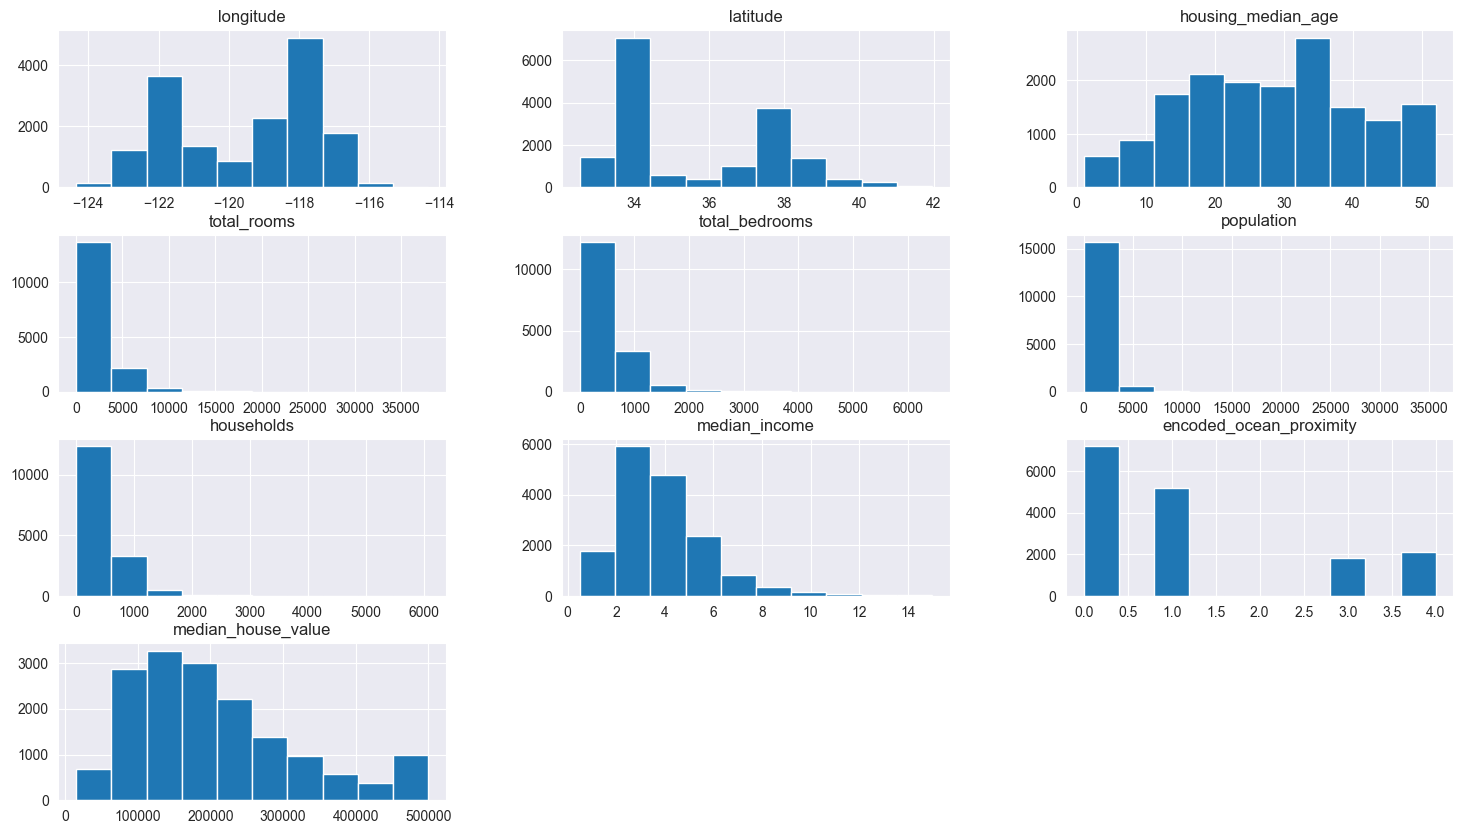

In [41]:
train_data.hist(figsize=(18,10))

<Axes: >

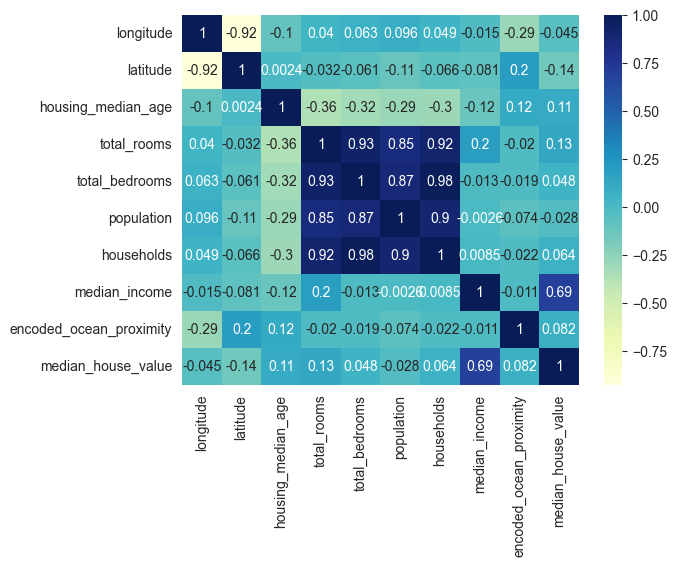

In [42]:
sns.heatmap(train_data.select_dtypes(include='number').corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

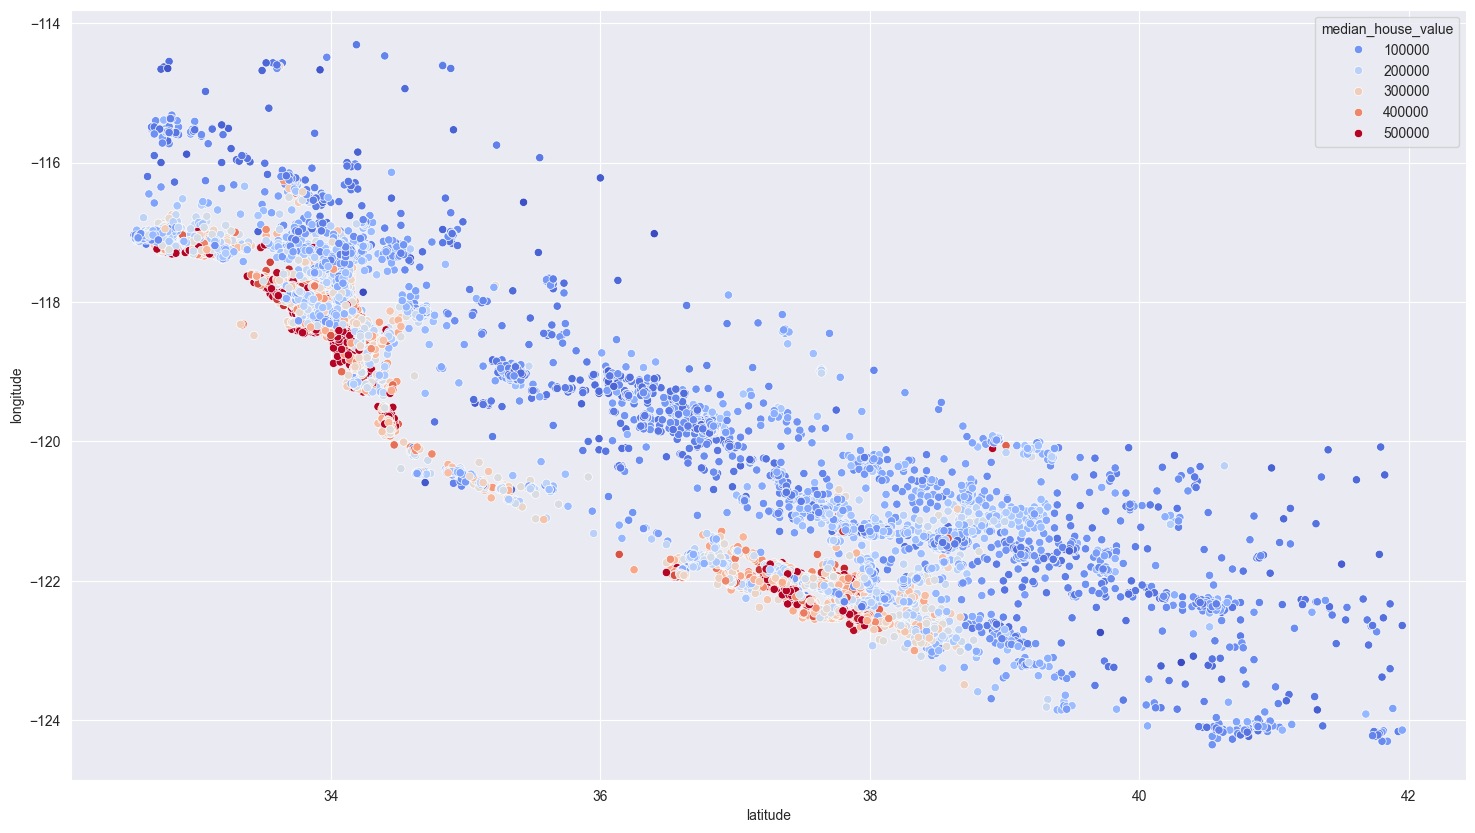

In [43]:
plt.figure(figsize=(18,10))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

## What we conclude ?
* The points with red are the most expensive houses and the points with blue are the cheapest houses
* The red points are mostly located at the cost of california (The nearest to the sea are more expensive)


## 6. Model Training

In [16]:
X_train, X_test, y_train, y_test = train_test_split(input_df, target_df, test_size=0.2)

### Linear Regression Model

In [44]:
reg = LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
prediction_test = reg.predict(X_test)
print(y_test.values, prediction_test)

[308900. 192700. 143100. ... 187500.  91900. 135500.] [227703.16196536 229488.12133527 138549.19102282 ... 131415.47687477
 113769.22401951 203048.45299086]


### Model Evaluation for Linear Regression

In [46]:
MAEValue = mean_absolute_error(y_test, prediction_test)
MSEValue = mean_squared_error(y_test, prediction_test)
MdSEValue = median_absolute_error(y_test, prediction_test)

print('Mean Absolute Error Value is : ', MAEValue)
print('Mean Squared Error Value is : ', MSEValue)
print('Median Absolute Error Value is : ', MdSEValue)

Mean Absolute Error Value is :  50493.204404157696
Mean Squared Error Value is :  4694492631.773454
Median Absolute Error Value is :  38815.29249900207


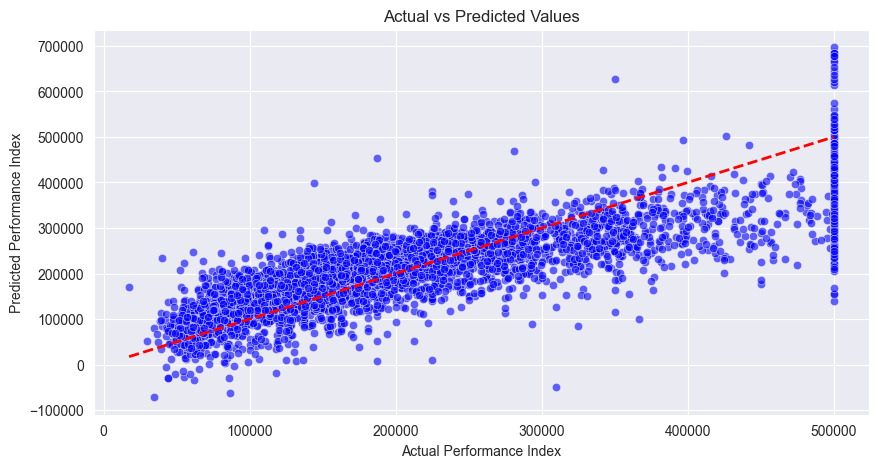

In [47]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=prediction_test, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Values")
plt.show()

### Random Forest Model

In [48]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [49]:
forest.score(X_test, y_test)

0.8255332383987165

In [50]:
prediction_test = forest.predict(X_test)
print(y_test.values, prediction_test)

[308900. 192700. 143100. ... 187500.  91900. 135500.] [260142.   206994.02 113458.   ... 132320.    84567.   191946.  ]


### Model Evaluation for Random Forest

In [51]:
r2 = r2_score(y_test, prediction_test)
mse = mean_squared_error(y_test, prediction_test)
mae = mean_absolute_error(y_test, prediction_test)

print("R² Score:", r2)
print("MSE:", mse)
print("MAE:", mae)

R² Score: 0.8255332383987165
MSE: 2308643406.9039254
MAE: 31261.37424516761


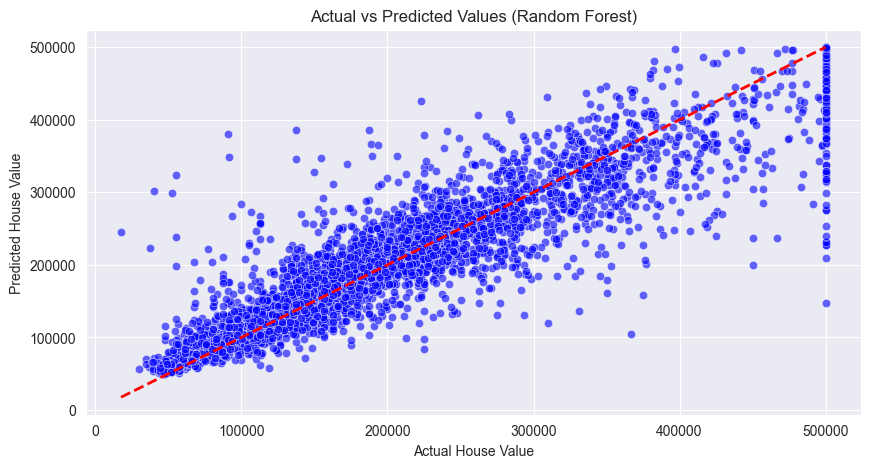

In [52]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=prediction_test, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted Values (Random Forest)")
plt.show()

---